In [4]:
import numpy as np
import pandas as pd
from pandas import  DataFrame

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
np.random.seed(7)

df = pd.read_csv(r"./泰迪杯数据01_大工业.csv")
df

,行业类型,日期1,有功功率最大值（kw）,有功功率最小值（kw）,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,大工业用电,2019-01-01,117888.3300,51526.5690,12,7,1,1,5.0,5.0
1,大工业用电,2019-01-02,126843.7914,63638.4294,11,6,1,1,8.0,8.0
2,大工业用电,2019-01-03,130286.1294,102048.2754,15,9,1,1,3.0,8.0
3,大工业用电,2019-01-04,133018.6344,104466.0762,17,12,1,1,5.0,8.0
4,大工业用电,2019-01-05,133504.4784,99507.3528,17,12,1,1,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...
973,大工业用电,2021-08-27,102950.5320,77916.3834,35,26,1,1,7.0,7.0
974,大工业用电,2021-08-28,107493.4824,82662.1020,33,26,1,1,7.0,3.0
975,大工业用电,2021-08-29,98528.9820,74703.2514,32,25,1,1,7.0,7.0
976,大工业用电,2021-08-30,106633.8348,79252.9464,34,26,1,1,6.0,6.0


In [5]:
df.columns
df  = df.rename(columns={'日期1':'date'}) #将日期1改为date

In [6]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'])
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'}) #将date变为蓝色

,行业类型,date,有功功率最大值（kw）,有功功率最小值（kw）,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,大工业用电,2019-01-01 00:00:00,117888.330000,51526.569000,12,7,1,1,5.000000,5.000000
1,大工业用电,2019-01-02 00:00:00,126843.791400,63638.429400,11,6,1,1,8.000000,8.000000
2,大工业用电,2019-01-03 00:00:00,130286.129400,102048.275400,15,9,1,1,3.000000,8.000000
3,大工业用电,2019-01-04 00:00:00,133018.634400,104466.076200,17,12,1,1,5.000000,8.000000
4,大工业用电,2019-01-05 00:00:00,133504.478400,99507.352800,17,12,1,1,5.000000,8.000000


In [7]:
df.isna().sum()

行业类型            0
date            0
有功功率最大值（kw）     0
有功功率最小值（kw）     0
最高温度            0
最低温度            0
白天风力风向          0
夜晚风力风向          0
天气1            10
天气2             3
dtype: int64

In [8]:
df = df.fillna(method='ffill',axis=0)

In [9]:
df.drop('date', axis=1).columns

Index(['行业类型', '有功功率最大值（kw）', '有功功率最小值（kw）', '最高温度', '最低温度', '白天风力风向',
       '夜晚风力风向', '天气1', '天气2'],
      dtype='object')

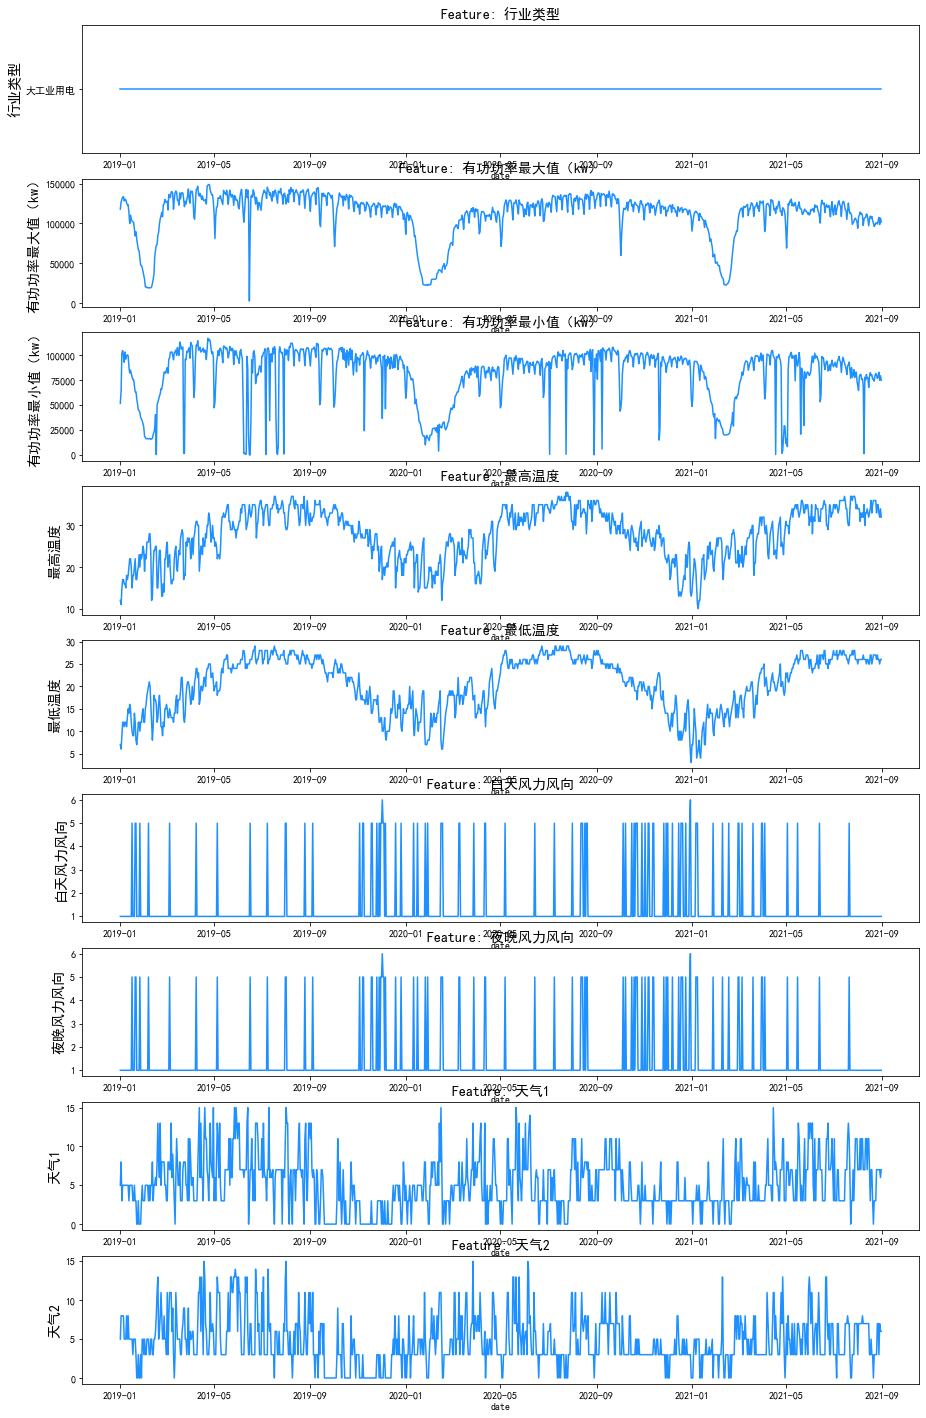

In [10]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=9, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):  #enumerate将组成一个遍历序列
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')  #lineplot方法画图
    ax[i].set_title('Feature: {}'.format(column), fontsize=14) #显示标题
    ax[i].set_ylabel(ylabel=column, fontsize=14) #显示y轴变量

#     ax[i].set_xlim([date(2019, 1, 1), date(2021, 8, 31)]) #设置x轴的范围

In [11]:
#补缺失值
df['有功功率最大值（kw）'] = df['有功功率最大值（kw）'].interpolate()
df['有功功率最小值（kw）'] = df['有功功率最小值（kw）'].interpolate()
df.index = df['date']

## 4 数据平滑与采样

In [12]:
# 行重复删除
df[df.index.duplicated()]
df = df[~df.index.duplicated()]

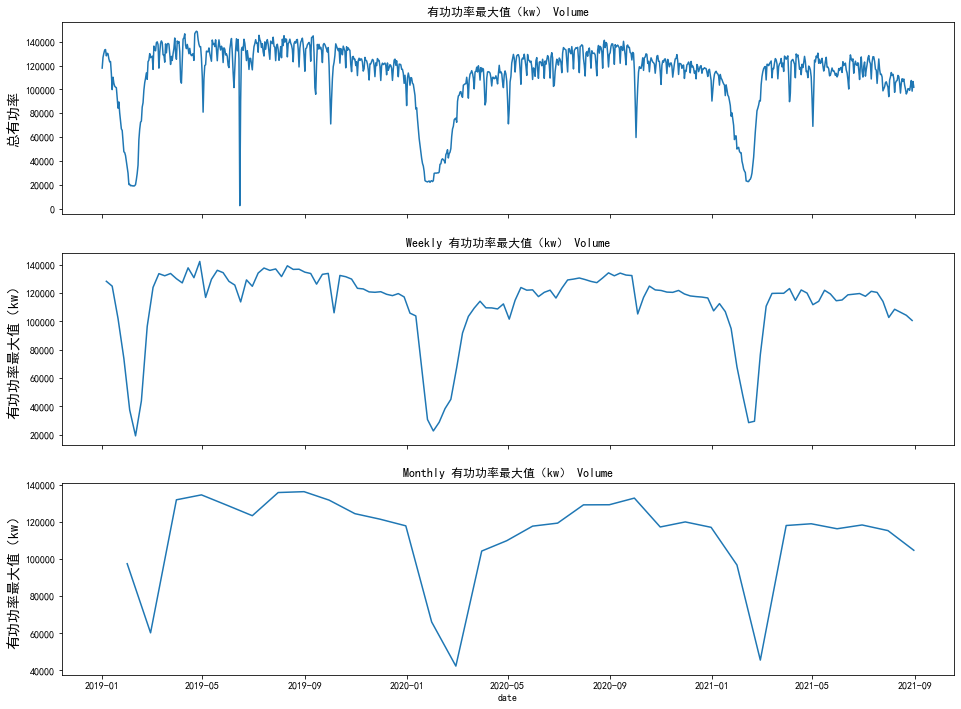

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(16,12))

sns.lineplot(x=df['date'],y=df['有功功率最大值（kw）'],ax=ax[0])
ax[0].set_title('有功功率最大值（kw） Volume')
ax[0].set_ylabel(ylabel='总有功率',fontsize=14)

ts = df['有功功率最大值（kw）'].resample('W',closed='left').mean()
sns.lineplot(x=df['date'],y=ts,ax=ax[1])
ax[1].set_title('Weekly 有功功率最大值（kw） Volume')
ax[1].set_ylabel(ylabel='有功功率最大值（kw）',fontsize=14)

ts = df['有功功率最大值（kw）'].resample('M',closed='left').mean()
sns.lineplot(x=df['date'],y=ts,ax=ax[2])
ax[2].set_title('Monthly 有功功率最大值（kw） Volume')
ax[2].set_ylabel(ylabel='有功功率最大值（kw）',fontsize=14)


for i in range(3):
#     ax[i].set_xlim([date(2019,1,1),date(2021,8,31)])
    plt.show()

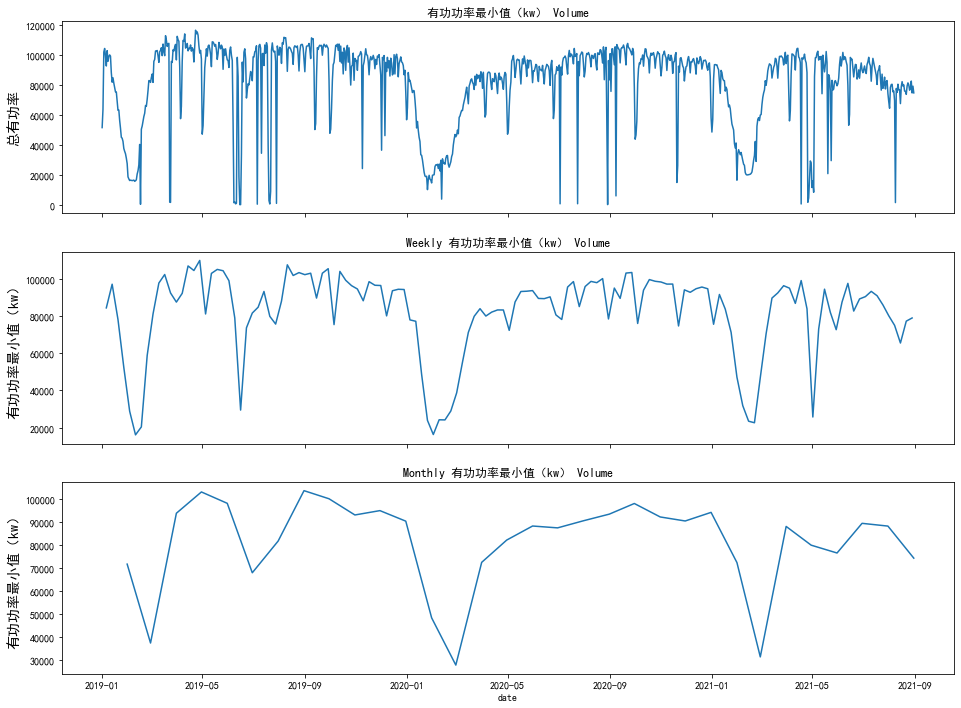

In [14]:
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(16,12))

sns.lineplot(x=df['date'],y=df['有功功率最小值（kw）'],ax=ax[0])
ax[0].set_title('有功功率最小值（kw） Volume')
ax[0].set_ylabel(ylabel='总有功率',fontsize=14)

ts = df['有功功率最小值（kw）'].resample('W',closed='left').mean()
sns.lineplot(x=df['date'],y=ts,ax=ax[1])
ax[1].set_title('Weekly 有功功率最小值（kw） Volume')
ax[1].set_ylabel(ylabel='有功功率最小值（kw）',fontsize=14)

ts = df['有功功率最小值（kw）'].resample('M',closed='left').mean()
sns.lineplot(x=df['date'],y=ts,ax=ax[2])
ax[2].set_title('Monthly 有功功率最小值（kw） Volume')
ax[2].set_ylabel(ylabel='有功功率最小值（kw）',fontsize=14)


for i in range(3):
#     ax[i].set_xlim([date(2019,1,1),date(2021,8,31)])
    plt.show()

## 5 平稳性检验

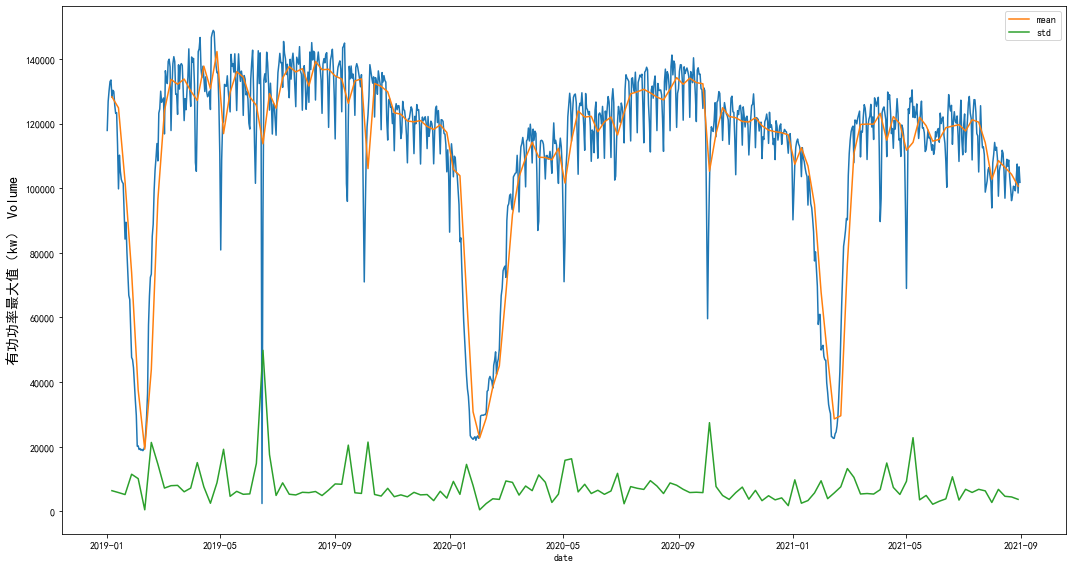

In [15]:
rolling_window = 52
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

ts = df['有功功率最大值（kw）'].resample('W',closed='left').mean()
ts1 = df['有功功率最大值（kw）'].resample('W',closed='left').std()
sns.lineplot(x=df['date'],y=df['有功功率最大值（kw）'],ax=ax)
sns.lineplot(x=df['date'],y=ts,ax=ax,label='mean')
sns.lineplot(x=df['date'],y=ts1,ax=ax,label='std')
ax.set_ylabel(ylabel='有功功率最大值（kw） Volume', fontsize=14)
# ax.set_xlim([date(2019, 1, 1), date(2021, 8, 31)])
plt.tight_layout()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['有功功率最大值（kw）'].values)
result
#p值小于0.05，第一个值比第五个值小，趋势平稳

(-4.773941697264406,
 6.0984509266357117e-05,
 21,
 951,
 {'1%': -3.4372448882473177,
  '5%': -2.86458394997689,
  '10%': -2.5683907715382888},
 19869.34751296723)

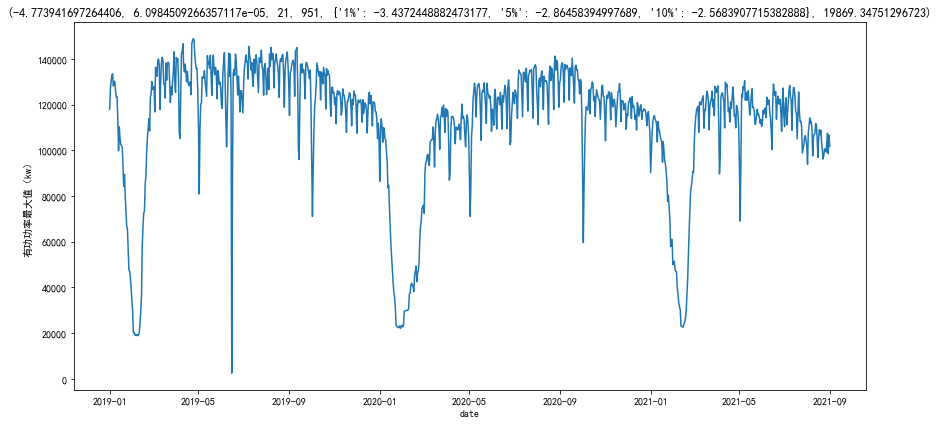

In [17]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

def visualize_adfuller_results(series, title, ax):
    sns.lineplot(x=df['date'],y=series,ax=ax)
    ax.set_title(result)
    ax.set_ylabel(title)
#     ax.set_xlim([date(2019, 1, 1), date(2021, 8, 31)])

visualize_adfuller_results(df['有功功率最大值（kw）'].values, '有功功率最大值（kw）',ax=ax)
# visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
# visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
# visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
# visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

# f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

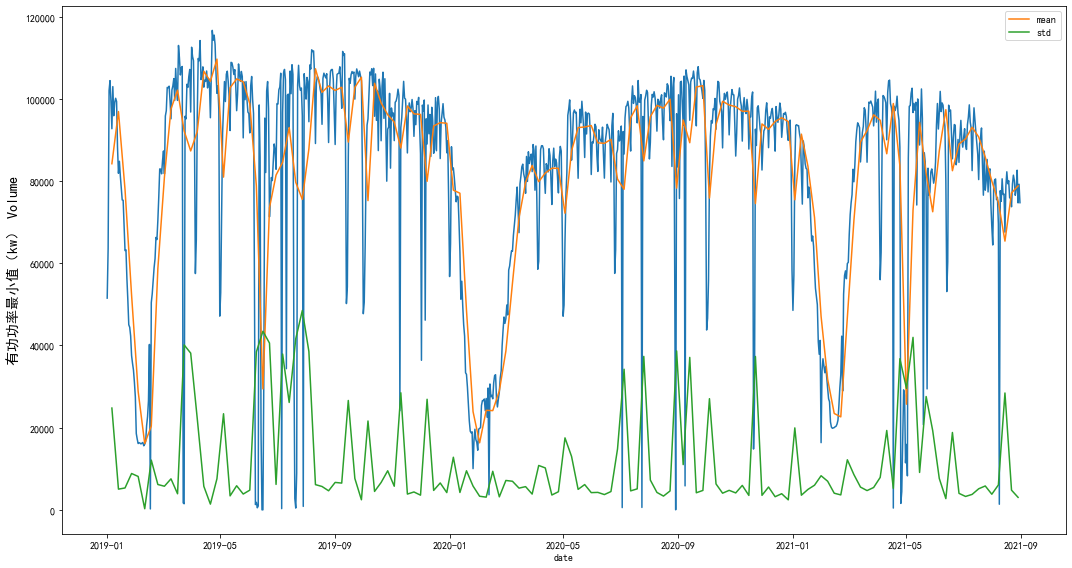

In [18]:
rolling_window = 52
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

ts = df['有功功率最小值（kw）'].resample('W',closed='left').mean()
ts1 = df['有功功率最小值（kw）'].resample('W',closed='left').std()
sns.lineplot(x=df['date'],y=df['有功功率最小值（kw）'],ax=ax)
sns.lineplot(x=df['date'],y=ts,ax=ax,label='mean')
sns.lineplot(x=df['date'],y=ts1,ax=ax,label='std')
ax.set_ylabel(ylabel='有功功率最小值（kw） Volume', fontsize=14)
# ax.set_xlim([date(2019, 1, 1), date(2021, 8, 31)])
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['有功功率最小值（kw）'].values)
result
#p值小于0.05，第一个值比第五个值小，趋势平稳

(-4.539099023049511,
 0.0001670104558179085,
 7,
 965,
 {'1%': -3.4371445907959832,
  '5%': -2.864539720789528,
  '10%': -2.5683672133480093},
 21214.793680829996)

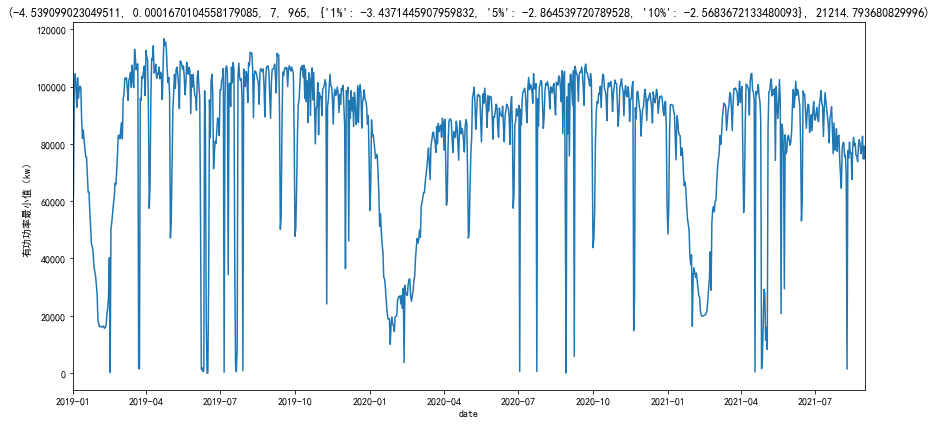

In [20]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

def visualize_adfuller_results(series, title, ax):
    sns.lineplot(x=df['date'],y=series,ax=ax)
    ax.set_title(result)
    ax.set_ylabel(title)
    ax.set_xlim([date(2019, 1, 1), date(2021, 8, 31)])

visualize_adfuller_results(df['有功功率最小值（kw）'].values, '有功功率最小值（kw）',ax=ax)
# visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
# visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
# visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
# visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

# f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

## 异常值处理

In [21]:
from scipy.stats import kstest
#正态检测
u = df['有功功率最大值（kw）'].mean()
# 计算标准差
std = df['有功功率最大值（kw）'].std()
# 计算P值
res=kstest(df['有功功率最大值（kw）'].astype(float),  'norm', (u, std))[1]
print(res)
# 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
if res<=0.05:
    print('该列数据服从正态分布------------')
    print('均值为：%.3f，标准差为：%.3f' % (u, std))
    print('------------------------------')
else:
    print("错误")

#KS检验3σ异常点检测
sum =[]
# 计算均值
u = df['有功功率最大值（kw）'].mean()
# 计算标准差
std = df['有功功率最大值（kw）'].std()
# 定义3σ法则识别异常值
# 识别异常值
error = df['有功功率最大值（kw）'][np.abs(df['有功功率最大值（kw）'] - u) > 3 * std]
df.loc[error.index,'总有功功率（kw）'] = np.nan
# 剔除异常值，保留正常的数据
data_c = df['有功功率最大值（kw）'][np.abs(df['有功功率最大值（kw）'] - u) <= 3 * std]
# 输出异常数据
sum.append(error)
# print(error)

6.082158593007391e-35
该列数据服从正态分布------------
均值为：112443.007，标准差为：28292.734
------------------------------


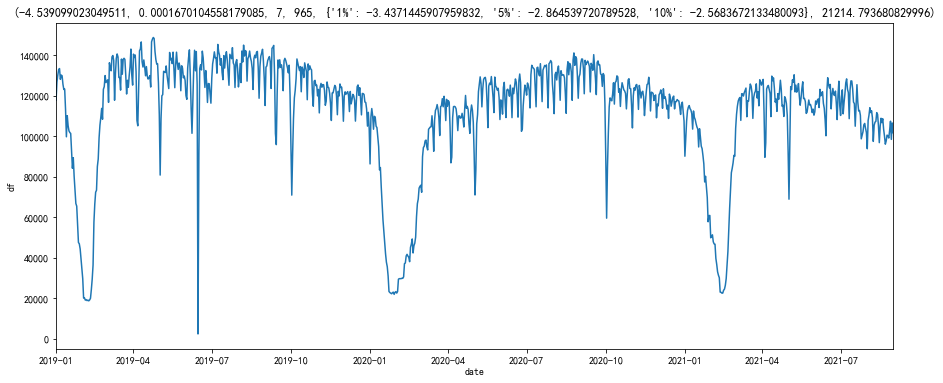

In [22]:
df = df.fillna(method='ffill',axis=0)  #异常处理

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['有功功率最大值（kw）'],'df' , ax=ax)

In [23]:
from scipy.stats import kstest
#正态检测
u = df['有功功率最小值（kw）'].mean()
# 计算标准差
std = df['有功功率最小值（kw）'].std()
# 计算P值
res=kstest(df['有功功率最小值（kw）'].astype(float),  'norm', (u, std))[1]
print(res)
# 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
if res<=0.05:
    print('该列数据服从正态分布------------')
    print('均值为：%.3f，标准差为：%.3f' % (u, std))
    print('------------------------------')
else:
    print("错误")

#KS检验3σ异常点检测
sum =[]
# 计算均值
u = df['有功功率最小值（kw）'].mean()
# 计算标准差
std = df['有功功率最小值（kw）'].std()
# 定义3σ法则识别异常值
# 识别异常值
error = df['有功功率最小值（kw）'][np.abs(df['有功功率最小值（kw）'] - u) > 3 * std]
df.loc[error.index,'总有功功率（kw）'] = np.nan
# 剔除异常值，保留正常的数据
data_c = df['有功功率最小值（kw）'][np.abs(df['有功功率最小值（kw）'] - u) <= 3 * std]
# 输出异常数据
sum.append(error)
# print(error)

2.6413841234796336e-31
该列数据服从正态分布------------
均值为：81614.654，标准差为：27275.835
------------------------------


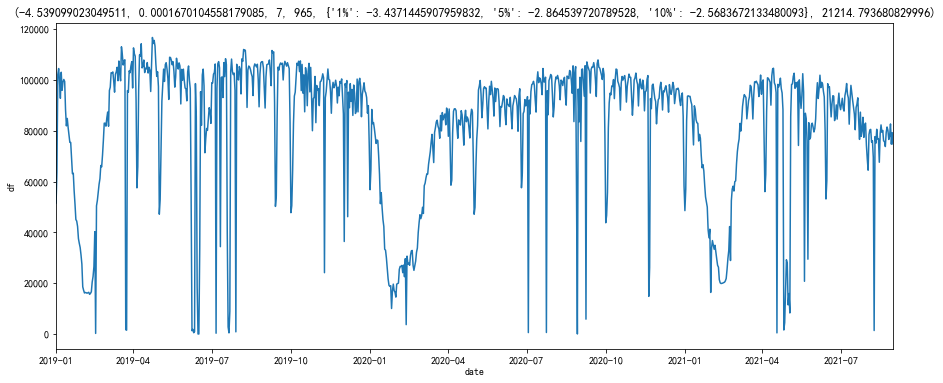

In [24]:
df = df.fillna(method='ffill',axis=0)  #异常处理

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['有功功率最小值（kw）'],'df' , ax=ax)

In [25]:
df['有功功率最大值（kw）'] = df['有功功率最大值（kw）'].astype(float)
df['有功功率最小值（kw）'] = df['有功功率最小值（kw）'].astype(float)
df['最高温度'] = df['最高温度'].astype(float)
df['最低温度'] = df['最低温度'].astype(float)
df['白天风力风向'] = df['白天风力风向'].astype(float)
df['夜晚风力风向'] = df['夜晚风力风向'].astype(float)
df['天气1'] = df['天气1'].astype(float)
df['天气2'] = df['天气2'].astype(float)

Text(0.5, 1.0, 'Correlation Matrix of Lagged Features')

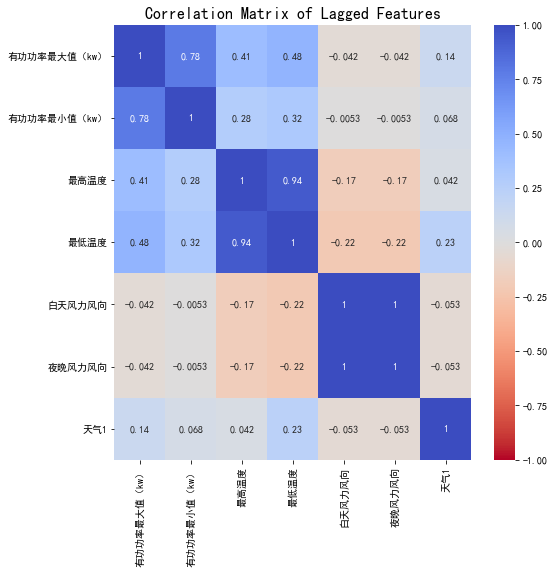

In [26]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

shifted_cols = df.columns[1:9]
corrmat = df[shifted_cols].corr()  #输出函数的相关性

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')  #画出相关性的热力图
ax.set_title('Correlation Matrix of Lagged Features', fontsize=16)

## LSTM大工业最大功率三十天预测

In [62]:
test_size = 91  #预测测试值范围
train_size =  610 #预测训练值范围
df = df.fillna(0)
univariate_df = df[['date', '有功功率最大值（kw）']][:701].copy()
univariate_df.columns = ['ds', 'y']


# LSTM对输入数据的大小敏感，需要对输入数据做标准化处理
# 使用MinMaxScaler将数据映射到0-1区间
from sklearn.preprocessing import MinMaxScaler
data = univariate_df.filter(['y'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[-10:]

array([[-0.2479203 ],
       [-0.18444634],
       [-0.185899  ],
       [-0.18862296],
       [-0.2127699 ],
       [-0.1966955 ],
       [-0.19394348],
       [-0.2709437 ],
       [-0.22486091],
       [-0.23061387]])

In [63]:
def check(du):
    #正态检测
    u = du.mean()
    # 计算标准差
    std = du.std()
    # 计算P值
    res=kstest(du.astype(float),  'norm', (u, std))[1]
    print(res)
    # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
    if res<=0.05:
        print('该列数据服从正态分布------------')
        print('均值为：%.3f，标准差为：%.3f' % (u, std))
        print('------------------------------')
    else:
        print("错误")

def sta(sta_du):
    stas = []
    u = sta_du.mean()
    std = sta_du.std()
    for i in sta_du:
        stas.append((i-u)/(std*std))
    return stas

In [64]:
du_day_max = df['最高温度'][:701]
du_day_min = df['最低温度'][:701]

#温度标准化
from scipy.stats import kstest
check(du_day_max)
check(du_day_min)
du_day_max = sta(du_day_max)
du_day_min = sta(du_day_min)

3.300002051892593e-06
该列数据服从正态分布------------
均值为：27.877，标准差为：6.021
------------------------------
7.194159637281362e-13
该列数据服从正态分布------------
均值为：20.709，标准差为：5.725
------------------------------


<AxesSubplot:ylabel='Density'>

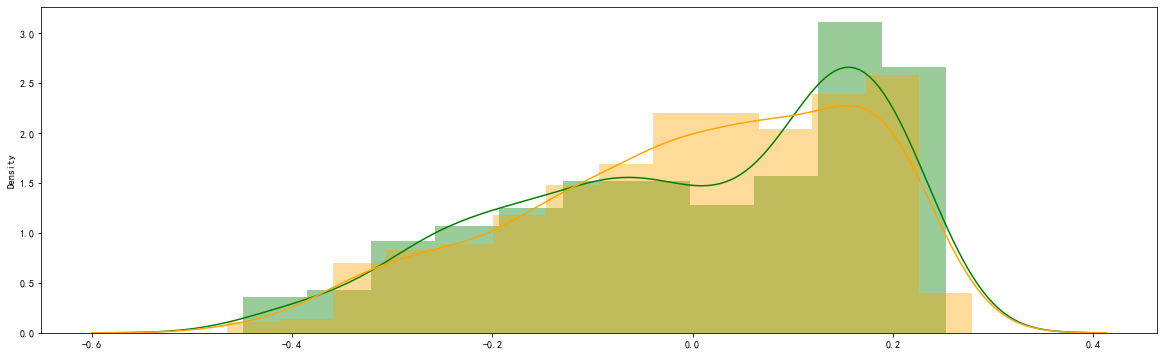

In [65]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
sns.distplot(du_day_min, ax=ax,color='green',label='du_day_max') #直方图和核密度图的结合，查看单个连续型变量的分布
sns.distplot(du_day_max, ax=ax, color='orange',label='du_day_min') #直方图和核密度图的结合，查看单个连续型变量的分布

In [66]:
du_day_max = list(map(list, zip(du_day_max)))
du_day_min = list(map(list, zip(du_day_min)))

In [67]:
look_back = 7 # 96
# 将数据分为训练集、测试集
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

# 生成t-x数据
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# 设置随机种子，保证复现

np.random.seed(7)


x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

#添加特征列
x_train = np.append(x_train,du_day_max[0:train_size-look_back*2],axis=1)
x_train = np.append(x_train,du_day_min[0:train_size-look_back*2],axis=1)
x_test = np.append(x_test,du_day_max[train_size:],axis=1)
x_test = np.append(x_test,du_day_min[train_size:],axis=1)


# LSTM网络的输入为【批次大小(行数)，时间步长，特征数量(列数)】
# 将数据转换为符合输入的格式
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

596 91


In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 创建LSTM模型，拟合数据
model = Sequential()

# 添加128个LSTM神经元的隐层网络
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]))) #return_sequences=True
#model.add(LSTM(64, return_sequences=False))
model.add(Dense(30))
#model.add(Dense(1))

# 损失函数与adam优化器
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练数据10期, batch_size:一次训练抓取的样本数量
model.fit(x_train, y_train, batch_size=16, epochs=150 )  #validation_data=(x_test, y_test)

model.summary()

Epoch 1/150
38/38 [==============================] - 1s 2ms/step - loss: 0.0624
Epoch 2/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 4/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 5/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 6/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 7/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 8/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 9/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 10/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 11/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 12/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 13/150
38/38 [=================

38/38 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 103/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 104/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 105/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 106/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 107/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 108/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 109/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 110/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 111/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 112/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 113/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 114/150
38/38 [=========

In [69]:
# 预测
#train_predict = model.predict(x_train)
test_predict = model.predict(x_test) # 3个月的数据

# 前面把数据缩放到0-1范围。
# 现在跟实际值做比较，将预测值反标准化，从0-1范围转换为原数据范围
#train_predict = scaler.inverse_transform(train_predict)
#y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# 评估RMSE误差
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,1]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,1])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
from sklearn.metrics import r2_score
print('R2-score:',r2_score(y_test[0], test_predict[:,1]))

RMSE: 7931.294684691357
R2-score: 0.5430564958967481


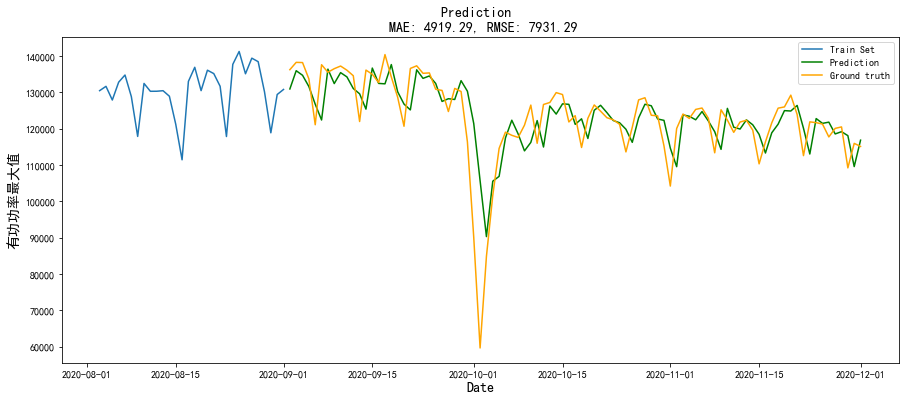

In [70]:
# 准备画图 - 训练数据
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_predict[:,0].size)['ds']

# 准备画图 - 测试数据
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks[-30:], y=y_train[-30:], ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='有功功率最大值', fontsize=14)
plt.show()

In [72]:
day_max=test_predict[:,0]
day_index = pd.date_range(start='2020-09-01',end='2020-11-30',freq='D')
day_index = pd.DataFrame(day_index,columns=['date_day'])

day_max = pd.DataFrame(day_max,columns=['min'])
day_max = pd.concat((day_max,day_index),axis=1)
day_max.index = day_max['date_day']

In [39]:
# for i in range(test_predict['sum'].count()):
#     if (test_predict.iloc[i,0] == test_predict['sum'].max()):
#         print("\n最大值为：",test_predict.iloc[i,0])
#         print("最大日期为：",test_predict.iloc[i,1])
#     if (test_predict.iloc[i,0] == test_predict['sum'].min()):
#         print("\n最小值为：",test_predict.iloc[i,0])
#         print("最小日期为：",test_predict.iloc[i,1])
# print(f'\nPrediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## LSTM大工业最小功率三十天预测

In [73]:
test_size = 91  #预测测试值范围
train_size = 610  #预测训练值范围
df = df.fillna(0)
univariate_df = df[['date', '有功功率最小值（kw）']][:701].copy()
univariate_df.columns = ['ds', 'y']


# LSTM对输入数据的大小敏感，需要对输入数据做标准化处理
# 使用MinMaxScaler将数据映射到0-1区间
from sklearn.preprocessing import MinMaxScaler
data = univariate_df.filter(['y'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[-10:]

array([[-0.20603995],
       [-0.24013125],
       [-0.16133483],
       [-0.15727558],
       [-0.17984976],
       [-0.20533999],
       [-0.21610007],
       [-0.29129109],
       [-0.23984368],
       [-0.2096614 ]])

In [74]:
def check(du):
    #正态检测
    u = du.mean()
    # 计算标准差
    std = du.std()
    # 计算P值
    res=kstest(du.astype(float),  'norm', (u, std))[1]
    print(res)
    # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
    if res<=0.05:
        print('该列数据服从正态分布------------')
        print('均值为：%.3f，标准差为：%.3f' % (u, std))
        print('------------------------------')
    else:
        print("错误")

def sta(sta_du):
    stas = []
    u = sta_du.mean()
    std = sta_du.std()
    for i in sta_du:
        stas.append((i-u)/(std*std))
    return stas

In [75]:
du_day_max = df['最高温度'][:701]
du_day_min = df['最低温度'][:701]

#温度标准化
from scipy.stats import kstest
check(du_day_max)
check(du_day_min)
du_day_max = sta(du_day_max)
du_day_min = sta(du_day_min)

3.300002051892593e-06
该列数据服从正态分布------------
均值为：27.877，标准差为：6.021
------------------------------
7.194159637281362e-13
该列数据服从正态分布------------
均值为：20.709，标准差为：5.725
------------------------------


<AxesSubplot:ylabel='Density'>

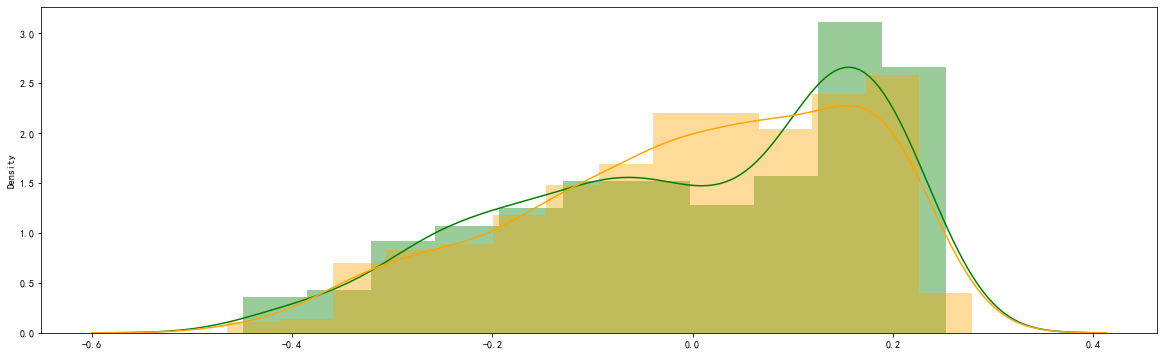

In [76]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
sns.distplot(du_day_min, ax=ax,color='green',label='du_day_max') #直方图和核密度图的结合，查看单个连续型变量的分布
sns.distplot(du_day_max, ax=ax, color='orange',label='du_day_min') #直方图和核密度图的结合，查看单个连续型变量的分布

In [77]:
du_day_max = list(map(list, zip(du_day_max)))
du_day_min = list(map(list, zip(du_day_min)))

In [78]:
look_back = 7 # 96
# 将数据分为训练集、测试集
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

# 生成t-x数据
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# 设置随机种子，保证复现

np.random.seed(7)


x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

#添加特征列
x_train = np.append(x_train,du_day_max[0:train_size-look_back*2],axis=1)
x_train = np.append(x_train,du_day_min[0:train_size-look_back*2],axis=1)
x_test = np.append(x_test,du_day_max[train_size:],axis=1)
x_test = np.append(x_test,du_day_min[train_size:],axis=1)


# LSTM网络的输入为【批次大小(行数)，时间步长，特征数量(列数)】
# 将数据转换为符合输入的格式
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

596 91


In [79]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 创建LSTM模型，拟合数据
model = Sequential()

# 添加128个LSTM神经元的隐层网络
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]))) #return_sequences=True
#model.add(LSTM(64, return_sequences=False))
model.add(Dense(30))
#model.add(Dense(1))

# 损失函数与adam优化器
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练数据10期, batch_size:一次训练抓取的样本数量
model.fit(x_train, y_train, batch_size=16, epochs=150 )  #validation_data=(x_test, y_test)

model.summary()

Epoch 1/150
38/38 [==============================] - 1s 2ms/step - loss: 0.0915
Epoch 2/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 3/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 4/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 5/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 6/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 7/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 8/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 9/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 10/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 11/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 12/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 13/150
38/38 [=================

38/38 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 103/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 104/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 105/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 106/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 107/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 108/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 109/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 110/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 111/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 112/150
38/38 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 113/150
38/38 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 114/150
38/38 [=========

In [80]:
# 预测
#train_predict = model.predict(x_train)
test_predict = model.predict(x_test) # 3个月的数据

# 前面把数据缩放到0-1范围。
# 现在跟实际值做比较，将预测值反标准化，从0-1范围转换为原数据范围
#train_predict = scaler.inverse_transform(train_predict)
#y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# 评估RMSE误差
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,1]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,1])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
from sklearn.metrics import r2_score
print('R2-score:',r2_score(y_test[0], test_predict[:,1]))

RMSE: 17489.672602479644
R2-score: 0.0638284437597274


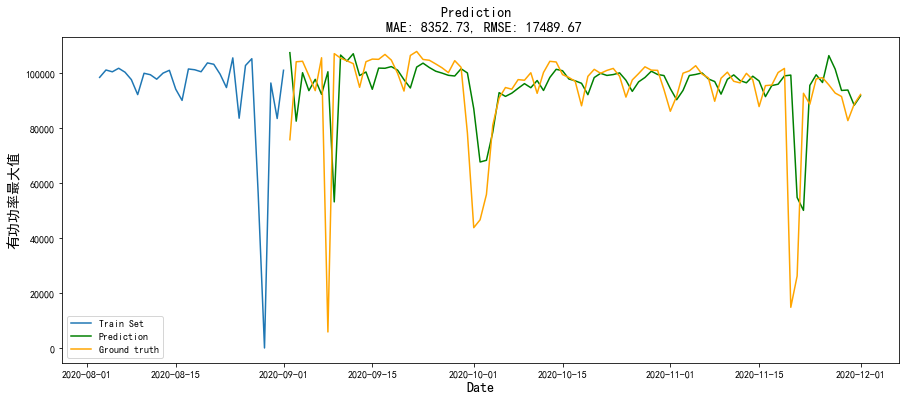

In [81]:
# 准备画图 - 训练数据
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_predict[:,0].size)['ds']

# 准备画图 - 测试数据
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks[-30:], y=y_train[-30:], ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='有功功率最大值', fontsize=14)
plt.show()

In [82]:
day_min = test_predict[:,0]
day_index = pd.date_range(start='2021-09-01',end='2021-11-30',freq='D')
day_index = pd.DataFrame(day_index,columns=['date_day'])

day_min = pd.DataFrame(day_min,columns=['max'])
day_min = pd.concat((day_min,day_index),axis=1)
day_min.index = day_min['date_day']

In [83]:
day_max.to_csv("数据预测大工业30天max.csv",index=False,encoding='utf_8_sig')
day_min.to_csv("数据预测大工业30天min.csv",index=False,encoding='utf_8_sig')

In [96]:
for i in range(test_predict['sum'].count()):
    if (test_predict.iloc[i,0] == test_predict['sum'].max()):
        print("\n最大值为：",test_predict.iloc[i,0])
        print("最大日期为：",test_predict.iloc[i,1])
    if (test_predict.iloc[i,0] == test_predict['sum'].min()):
        print("\n最小值为：",test_predict.iloc[i,0])
        print("最小日期为：",test_predict.iloc[i,1])
print(f'\nPrediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}')


最大值为： 97384.45
最大日期为： 2021-06-17 00:00:00

最小值为： 42875.633
最小日期为： 2021-08-10 00:00:00

Prediction 
 MAE: 6001.52, RMSE: 10735.84
